In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon, Rectangle, RegularPolygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import ListedColormap
from typing import Dict, List, Tuple
import matplotlib.image as mpimg
import imageio
from PIL import Image
import yaml
from zipfile import ZipFile
import glob

In [17]:
np.random.seed(100)

## be aware of your current directory

In [18]:
print(os.getcwd())

/home/samehr/Desktop/cephal/cvmt/notebooks


## load parameters

In [19]:
with open("../code_configs/params.yaml") as f:
    params = yaml.safe_load(f)

## Sample image and annotations

In [22]:
file_path = os.path.join(
    params['INTERMEDIATE_DATA_DIRECTORY'],
    params['DATASET_1_INTERMEDIATE_DIR_NAME'],
    "1.json",
)

In [23]:
with open(file_path) as f:
    annotations = json.load(f)

### inspect the content of the annotations dictionary

In [24]:
print(annotations.keys())

dict_keys(['version', 'flags', 'shapes', 'imagePath', 'imageData', 'imageHeight', 'imageWidth'])


In [25]:
print(annotations['shapes'])

[{'label': 'c', 'points': [[145.0, 1038.0], [192.0, 1042.0], [253.0, 1051.0], [192.0, 1041.0]], 'group_id': 2, 'shape_type': 'polygon', 'flags': {}}, {'label': 'c', 'points': [[150.0, 1055.0], [129.0, 1143.0], [183.0, 1148.0], [243.0, 1165.0], [243.0, 1115.0]], 'group_id': 3, 'shape_type': 'polygon', 'flags': {}}, {'label': 'c', 'points': [[139.0, 1154.0], [118.0, 1240.0], [169.0, 1249.0], [232.0, 1259.0], [234.0, 1214.0]], 'group_id': 4, 'shape_type': 'polygon', 'flags': {}}]


In [26]:
print(type(annotations['shapes']))

<class 'list'>


In [27]:
print(len(annotations['shapes']))

3


In [28]:
print(annotations['shapes'][0])

{'label': 'c', 'points': [[145.0, 1038.0], [192.0, 1042.0], [253.0, 1051.0], [192.0, 1041.0]], 'group_id': 2, 'shape_type': 'polygon', 'flags': {}}


### plot the annotated polygons on a clean diagram

In [91]:
def plot_annots_landmarks(
    annots: Dict,
):
    patches = []
    width = annots['imageWidth']
    height = annots['imageHeight']
    coordinates_arr = np.empty((1,2))
    for annotation in annots['shapes']:
        # get the coordinates
        coordinates = np.array(annotation['points'])
        # flip the y axis of the coordinates
        coordinates[:,1] = height - coordinates[:,1]
        # normalize the coordinates based on the height and width
        coordinates = coordinates * np.array([1/width, 1/height])
        polygon = Polygon(xy=coordinates, closed=True)
        patches.append(polygon)
        coordinates_arr = np.vstack((coordinates_arr, coordinates))
        
    px = 1/plt.rcParams['figure.dpi'] 
    fig, ax = plt.subplots(figsize=(width*px*0.1, height*px*0.1))
    colors = 100 * (0.1,0.6,0.9)
    p = PatchCollection(patches, alpha=0.9)
    p.set_array(colors)
    ax.add_collection(p)

    ax.scatter(coordinates_arr[:,0], coordinates_arr[:,1], marker='*', c=['blue'])
    plt.show()

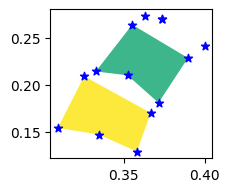

In [92]:
plot_annots_landmarks(
    annots=annotations,
)

## check the length of annotation fields in all annotation files

In [63]:
annot_file_paths = glob.glob(
    os.path.join(
        params['INTERMEDIATE_DATA_DIRECTORY'],
        params['DATASET_1_INTERMEDIATE_DIR_NAME'],
        "*.json",
    )
)

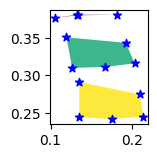

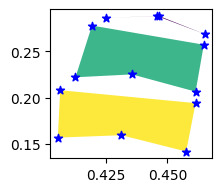

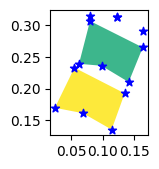

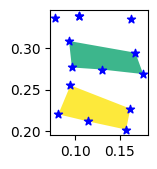

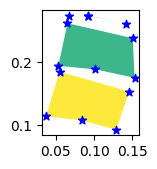

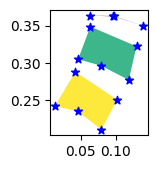

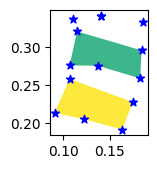

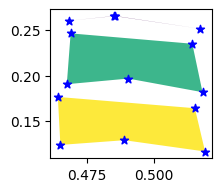

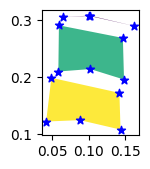

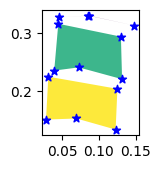

In [93]:
data_details = []
for i, annot_file_path in enumerate(annot_file_paths):
    with open(annot_file_path) as f:
        annotations = json.load(f)
    # check the lengths
    data_details.append(
        {
            annotations['shapes'][i]['group_id']:len(annotations['shapes'][i]['points']) for i in range(len(annotations['shapes']))
        }
    )
    # plot samples
    if i % 10 == 0:
        plot_annots_landmarks(
            annots=annotations,
        )

In [94]:
data_details

[{2: 4, 3: 5, 4: 5},
 {2: 4, 3: 5, 4: 5},
 {2: 4, 3: 5, 4: 5},
 {2: 4, 3: 5, 4: 5},
 {2: 4, 3: 5, 4: 5},
 {2: 4, 3: 5, 4: 5},
 {2: 4, 3: 5, 4: 5},
 {2: 4, 3: 5, 4: 5},
 {2: 4, 3: 5, 4: 5},
 {2: 4, 3: 5, 4: 5},
 {2: 4, 3: 5, 4: 5},
 {2: 4, 3: 5, 4: 5},
 {2: 4, 3: 5, 4: 5},
 {2: 4, 3: 5, 4: 5},
 {2: 4, 3: 5, 4: 5},
 {2: 4, 3: 5, 4: 5},
 {2: 4, 3: 5, 4: 5},
 {2: 4, 3: 5, 4: 5},
 {2: 4, 3: 5, 4: 5},
 {2: 4, 3: 5, 4: 5},
 {2: 4, 3: 5, 4: 5},
 {2: 4, 3: 5, 4: 5},
 {2: 4, 3: 5, 4: 5},
 {2: 4, 3: 5, 4: 5},
 {2: 4, 3: 5, 4: 5},
 {2: 4, 3: 5, 4: 5},
 {2: 4, 3: 5, 4: 5},
 {2: 4, 3: 5, 4: 5},
 {2: 4, 3: 5, 4: 5},
 {2: 4, 3: 5, 4: 5},
 {2: 4, 3: 5, 4: 5},
 {2: 4, 3: 5, 4: 5},
 {2: 4, 3: 5, 4: 5},
 {2: 4, 3: 5, 4: 5},
 {2: 4, 3: 5, 4: 5},
 {2: 4, 3: 5, 4: 5},
 {2: 4, 3: 5, 4: 5},
 {2: 4, 3: 5, 4: 5},
 {2: 4, 3: 5, 4: 5},
 {2: 4, 3: 5, 4: 5},
 {2: 4, 3: 5, 4: 5},
 {2: 4, 3: 5, 4: 5},
 {2: 4, 3: 5, 4: 5},
 {2: 4, 3: 5, 4: 5},
 {2: 4, 3: 5, 4: 5},
 {2: 4, 3: 5, 4: 5},
 {2: 4, 3: 5, 4: 5},
 {2: 4, 3: 5,